# Introduction to Artificial Intelligence: HS 2023


---

## Lecture 3: Non-parametric Models

K-Nearest Neighbors (K-NN) is considered a non-parametric method because it doesn't make any assumptions about the underlying data distribution. Non-parametric methods are in contrast to parametric methods, which assume a specific functional form or distribution for the data.

**Summary:**

*   K-NN is a simple and intuitive supervised learning algorithm used for both
 classification and regression tasks.
*   In classification, k-NN assigns a class label to a data point based on the majority class among its k-nearest neighbours.
* In regression, k-NN predicts a continuous value by averaging the target values of its k-nearest neighbours.
* The choice of distance metric should be based on the characteristics of your data. For example, use the Euclidean distance for continuous data and the Manhattan distance for categorical data.



## 0 - Loading Libraries

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## 1 - Loading the Dataset into a Pandas DataFrame

In this exercise, we will use the MNIST dataset contained in the `sklearn` library.

In [ ]:
# We start by loading the digits dataset into a variable named digits.
digits = datasets.load_digits()

print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [ ]:
# Note that the digits dataset is composed of images and their corresponding targets/ground-truths

# Plot the dimentionality of the images
print(digits.images.shape)

# Plot the dimentionality of the data
print(digits.data.shape)

# Plot the dimentionality of the target
print(digits.target.shape)

(1797, 8, 8)
(1797, 64)
(1797,)


## 2 - Visual Inspection of the Dataset

When dealing with a dataset prior the training procedure, it is always a good step to visually inspect the data by displaying some of the data samples together with their corresponding tasks.

In [ ]:
# Get the images and labels
X = digits.images # 1800 [8,8]
y = digits.target

In [ ]:
# Define a function to display images with labels as titles
def plot_digits(images, labels, nb_images, nb_rows, nb_cols):
    fig, axes = plt.subplots(nb_rows, nb_cols, figsize=(nb_cols, nb_rows))

    for i in range(nb_rows):
        for j in range(nb_cols):
            index = i * nb_cols + j
            if index < nb_images:
                ax = axes[i, j]
                #ax.imshow(images[index].reshape(8, 8), cmap='gray')
                ax.imshow(images[index], cmap='gray')
                ax.set_title('Target: {}'.format(labels[index]))
                ax.axis('off')

    plt.tight_layout()
    plt.show()

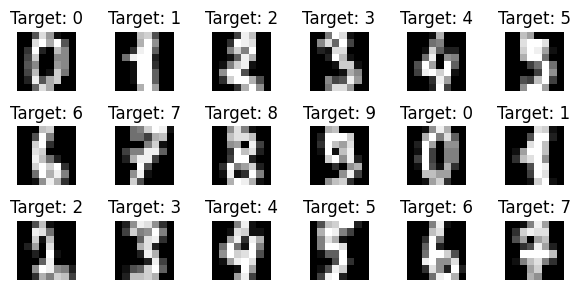

In [ ]:
plot_digits(images=X, labels=y, nb_images=18, nb_rows=3, nb_cols=6)

**Q: What are your thoughts after the visual inspection of the dataset?**

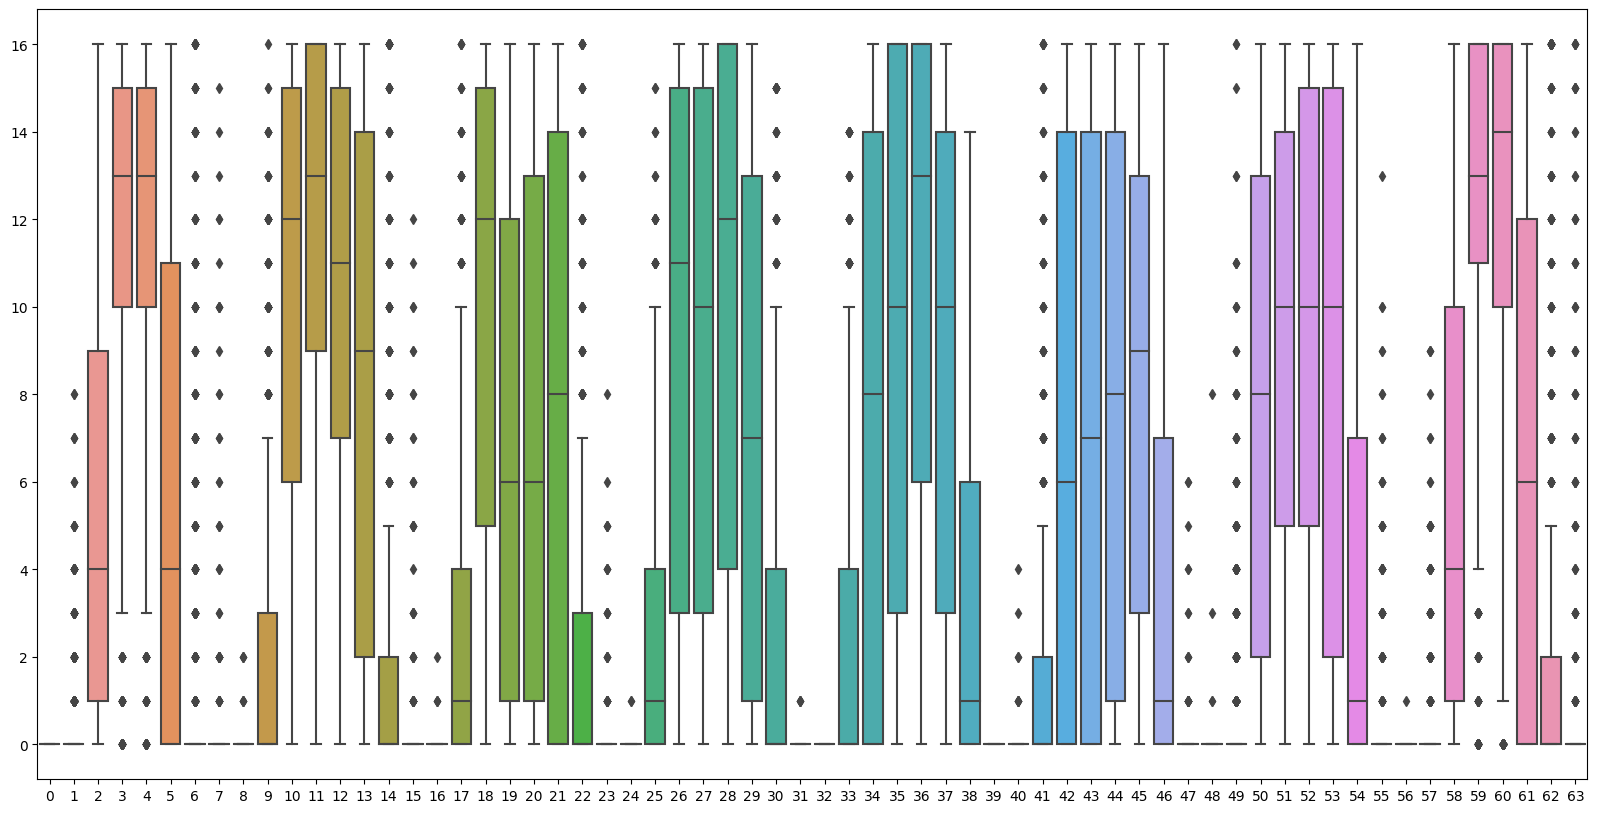

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=digits.data)
plt.show()

## 3 - Data Preprocessing

In [ ]:
# Access the data samples X together with their corresponding labels y
X = digits.data # [1800, 64]
y = digits.target # [1800]

# X and Y format
print(X.shape, y.shape)

(1797, 64) (1797,)


In [ ]:
# Split the (X,y)-annotated dataset onto a training a test dataset, by using 70%
# samples for training and 30% samples for testing. Also shuffle the samples.
# For that purposes, we will use the 'train_test_split' function contained in sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=48)

In [ ]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (1257, 64)
y_train.shape: (1257,)
X_test.shape: (540, 64)
y_test.shape: (540,)


In [ ]:
# We also will learn how to normalise the data using sklearn.
# This is very important, as k-NN relies on distance metrics to compute the similarities among the different samples.
# Thus, we use the standard scaler from sklearn preprocessing
from sklearn.preprocessing import StandardScaler

# Next, we scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Estimate mean-vector, std-vector
X_test = scaler.transform(X_test) # Normalise test samples using mean-vector, std-vector

In [ ]:
scaler.var_

array([0.00000000e+00, 8.61468220e-01, 2.27546032e+01, 1.80767533e+01,
       1.76383682e+01, 3.26855927e+01, 1.19002980e+01, 1.09835834e+00,
       8.71998273e-03, 1.02501087e+01, 2.92168952e+01, 1.61121927e+01,
       2.21052259e+01, 3.57588239e+01, 1.32043690e+01, 6.79100458e-01,
       1.58855833e-03, 1.23241583e+01, 3.35172555e+01, 3.28538621e+01,
       3.78162120e+01, 3.79534647e+01, 1.09018037e+01, 1.89929553e-01,
       7.94912057e-04, 1.01609393e+01, 3.84137150e+01, 3.45418186e+01,
       3.75058242e+01, 3.43368554e+01, 1.35620528e+01, 2.38093882e-03,
       0.00000000e+00, 1.14443236e+01, 3.90597127e+01, 3.94010819e+01,
       3.56997068e+01, 3.45739404e+01, 1.24179756e+01, 0.00000000e+00,
       1.26882141e-02, 8.11460531e+00, 4.21674910e+01, 4.13637856e+01,
       3.89715572e+01, 3.18729533e+01, 1.84284247e+01, 6.73422153e-02,
       5.87791898e-02, 3.46404953e+00, 3.24163846e+01, 2.78287749e+01,
       2.73916986e+01, 3.66506621e+01, 2.33076227e+01, 7.98880288e-01,
      

## 4 - Fitting a k-Nearest Neighbor Model into the Dataset

We use the `KNeighborsClassifier` class provided by scikit-learn to create a new KNN object named `knn_model`. We proceed to use this object to "fit" the training dataset:

In [ ]:
# Import the k-NN classifier from sklearn libraries
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialise a k-NN classifier and set the number k=10, for example
knn_model = KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Fit the training dataset to the initialised classifier.
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

**Q: What is the default metric and which other options do there exists?**



## 5 - Using the k-NN Model to Make Predictions

After training the KNN model, we can apply it to make predictions on previously unseen data.

In [ ]:
# Obtain the model's predictions on the test dataset
y_pred = knn_model.predict(X_test)
print(y_pred.shape)
print(y_pred)

(540,)
[0 8 2 2 3 9 8 6 6 4 8 7 5 7 7 1 2 2 4 3 3 3 8 9 1 2 2 0 4 0 7 0 2 2 7 5 9
 0 2 6 6 2 9 1 5 5 3 8 1 4 9 6 8 6 4 4 8 4 6 9 9 0 4 7 1 6 0 1 4 6 0 1 2 1
 1 9 3 8 4 8 4 2 9 7 5 4 0 9 4 8 9 4 2 4 9 1 9 6 8 6 0 8 8 5 7 0 3 0 7 7 1
 6 1 6 7 6 3 5 7 5 3 1 4 9 4 4 4 5 6 3 7 0 9 4 0 2 2 2 7 8 8 8 1 7 6 3 0 8
 7 1 2 5 0 3 6 3 2 6 0 9 0 3 4 3 8 0 5 0 3 4 3 6 1 1 8 6 8 8 2 8 5 8 4 2 6
 1 7 8 6 9 2 4 5 1 8 6 0 9 9 1 5 2 4 2 5 0 8 8 5 9 0 3 0 5 2 4 2 0 2 6 4 0
 6 5 2 1 1 3 2 6 8 2 7 2 2 1 0 7 0 1 2 4 3 7 6 1 4 7 0 5 2 3 1 8 0 2 0 1 3
 2 3 9 9 9 3 5 1 2 1 1 6 6 7 4 6 5 6 8 6 9 8 6 4 3 8 4 6 1 1 7 0 1 2 1 4 9
 1 3 8 1 3 6 6 8 5 2 6 1 1 4 3 1 3 6 2 2 9 1 0 5 3 9 9 4 6 3 0 3 9 4 9 0 2
 7 4 1 4 7 4 1 6 6 4 8 1 1 1 0 2 6 2 1 6 4 1 8 1 7 7 1 5 2 2 0 2 4 6 1 1 1
 3 5 0 9 4 7 1 0 4 7 8 1 6 9 4 3 4 0 7 7 6 8 0 0 1 5 7 4 7 3 0 6 7 0 5 3 7
 8 7 5 3 8 0 6 6 5 3 3 5 7 1 7 5 4 4 4 1 4 7 2 7 7 7 1 8 1 5 9 4 6 7 6 0 8
 0 5 1 0 0 7 1 2 4 9 2 5 6 1 6 5 9 1 3 3 9 4 5 6 9 7 1 3 8 6 1 1 0 7 8 0 2
 0 7 4 6 1 4 1 9 6

In [ ]:
print(y_test)

[0 8 2 2 3 9 8 6 6 4 8 7 5 7 7 8 2 2 4 3 3 3 8 9 1 2 2 0 4 0 7 0 2 2 7 5 9
 0 2 6 6 2 5 1 5 5 3 8 1 4 9 6 8 6 4 4 8 4 6 9 9 0 4 7 1 6 0 1 4 6 0 1 3 1
 1 9 3 8 4 8 4 2 9 7 5 4 0 9 4 8 9 4 2 4 9 1 9 6 8 6 0 8 8 5 7 0 3 0 7 7 1
 6 1 6 4 6 3 5 7 5 3 1 4 9 4 4 4 5 6 3 7 0 9 4 0 2 2 2 7 8 8 8 1 7 6 3 0 8
 7 1 2 5 0 3 6 3 2 6 0 9 0 3 4 3 8 0 5 0 3 4 3 6 8 1 8 6 8 8 2 8 5 4 4 2 6
 1 7 8 9 9 2 4 5 1 8 6 0 9 9 1 5 2 4 2 5 0 8 8 5 9 0 3 0 5 2 4 2 0 2 6 4 0
 6 5 2 1 1 3 2 6 8 2 7 2 2 1 0 7 0 1 2 4 3 4 6 1 4 7 0 5 2 3 1 8 0 2 0 1 3
 2 3 9 9 9 3 5 1 2 1 8 6 6 7 4 6 1 6 8 6 9 8 6 4 3 8 4 6 8 1 7 0 1 2 1 4 9
 8 3 8 5 3 6 6 8 5 2 6 1 1 4 3 1 3 6 2 2 9 6 0 5 3 9 9 4 6 3 0 3 9 4 9 0 2
 7 4 1 4 7 4 1 6 6 4 8 1 1 1 0 2 6 2 1 6 4 1 8 1 7 7 1 5 2 2 0 2 4 1 1 1 1
 3 5 0 9 4 7 1 0 4 7 8 1 6 9 4 3 4 0 7 7 6 8 0 0 1 5 7 4 7 3 0 6 7 0 5 3 7
 8 7 5 3 8 0 6 6 5 3 3 5 7 1 7 5 4 4 4 1 4 7 2 7 7 7 1 8 1 5 5 4 6 7 6 0 8
 0 5 1 0 0 7 1 2 4 9 2 5 6 1 6 5 9 1 3 3 9 4 5 6 9 7 1 3 3 6 1 1 0 7 8 0 2
 0 7 4 6 1 4 9 9 6 1 1 1 

In [ ]:
# Comput the model's accuracy. First, sum up how many predictions matched the ground-truths on the test dataset.
num_correct_predictions = (y_pred == y_test).sum()

In [ ]:
# Divide the number of correct predictions over the total size of the dataset.
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 96.11%


In [ ]:
# Use directly the 'score()' method from your classifier to directly display the model's accuracy.
accuracy = ...
print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 96.11%


## 6 - Reporting results on the Test Dataset

In [ ]:
# Import 'confusion_matrix' and 'ConfusionMatrixDisplay' from sklearn.metrics
from sklearn.metrics import ..., ...

cm = ...

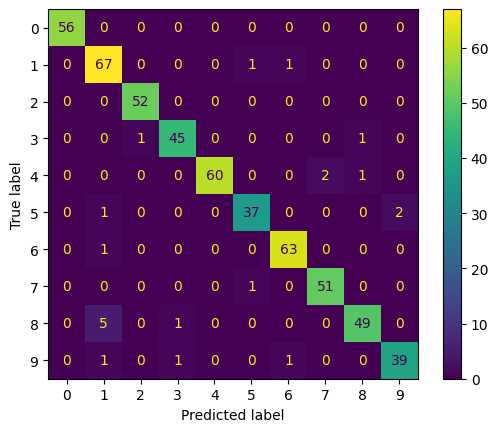

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=..., display_labels=...)
disp.plot()
plt.show()

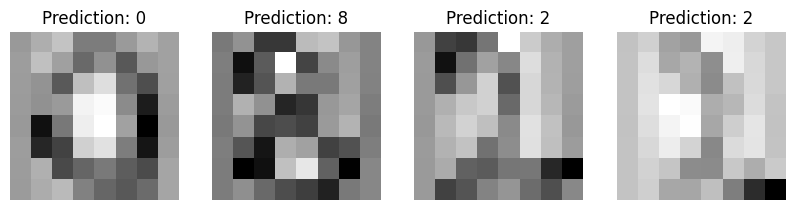

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

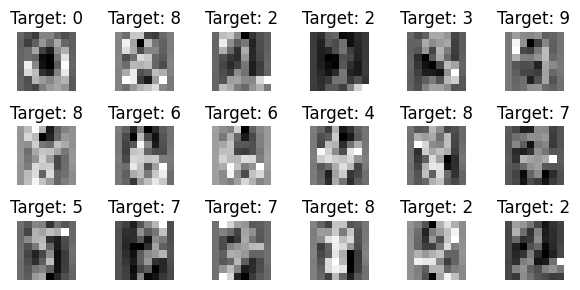

In [ ]:
plot_digits(X_test, y_pred, nb_images=18, nb_rows=3, nb_cols=6)

## 7 - Cross Validation to Get the Best Value for the hyperparameter k

Once we trained our model, we will explore how to use k-fold cross validation to estimate the best $k$ hyperparameter.

In [ ]:
# We start by importing the additional functions, namely cross_val_score
from sklearn.model_selection import ...

# We also will learn how to normalise the data using sklearn.
# Thus, we use the standard scaler from sklearn preprocessing
from sklearn.preprocessing import ...

In [ ]:
# Define a list containing the k-parameters to be later on explored
k_values = [2**i for i in range(0,7) ]
print(k_values)

[1, 2, 4, 8, 16, 32, 64]


In [ ]:
# Create an empty lists of scores:
scores = []

In [ ]:
# Iterate over each k-potential values
for k in k_values:
    knn = ... # Initialise a kNN classifier with 'k' neighbours.
    score = ... # Perform 5 cross-fold validation on the training dataset.
    print('# K-value: {}, scores = {}'.format(k, score))
    scores.append(...) # average the accuracy scores obtained after training the different k classifiers.

# K-value: 1, scores = [0.98015873 0.97619048 0.96414343 0.98007968 0.97211155]
# K-value: 2, scores = [0.98412698 0.98015873 0.9561753  0.97609562 0.9561753 ]
# K-value: 4, scores = [0.96825397 0.99206349 0.96015936 0.97609562 0.96414343]
# K-value: 8, scores = [0.96428571 0.98809524 0.95219124 0.97211155 0.97211155]
# K-value: 16, scores = [0.95634921 0.98015873 0.9561753  0.94422311 0.96812749]
# K-value: 32, scores = [0.91666667 0.94444444 0.93625498 0.92430279 0.93625498]
# K-value: 64, scores = [0.89285714 0.89285714 0.92430279 0.92031873 0.9123506 ]


In [ ]:
# Print the different scores
print(scores)

[0.9745367735407576, 0.9705463858850314, 0.9721431733383925, 0.9697590590020869, 0.9610067665844559, 0.931584772023019, 0.9085372794536142]


Text(0, 0.5, 'Accuracy Score')

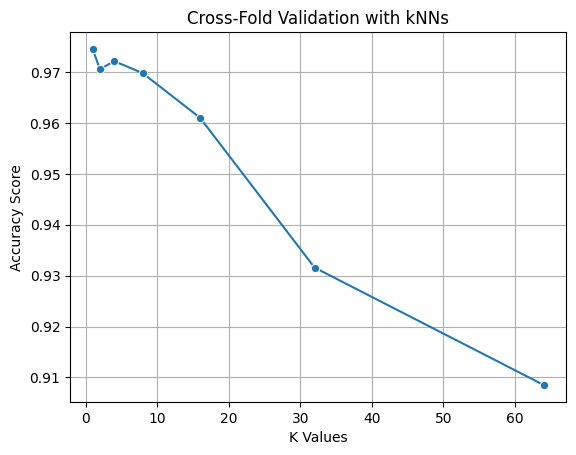

In [ ]:
import seaborn as sns
# Plot the different k-values against the corresponding accuracy scores
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.title('Cross-Fold Validation with kNNs')
plt.grid()
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
# From the score lists, find out the highest accuracy value:
best_index = ...
print('best index: {}'.format(best_index))

best index: 0


In [ ]:
# Get the corresponding best 'k' value
best_k = ...
print('best score: {}'.format(best_k))

best score: 1


In [ ]:
# Initialise a best kNN Classifier with the parameter found.
knnBest = ...

In [ ]:
# Fit your classifier on the training dataset
knnBest...

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Obtain the predictions on the test dataset
y_pred = ...

In [ ]:
# Import the 'accuracy_score' metric from sklearn.metrics
from sklearn.metrics import accuracy_score

# Compute the accuracy score by comparing the test ground-truths with the predictions (outputs from the model).
accuracy = ...
print("Accuracy:", accuracy)

Accuracy: 0.9703703703703703


In [ ]:
# Import 'confusion_matrix' and 'ConfusionMatrixDisplay' from sklearn.metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = ...

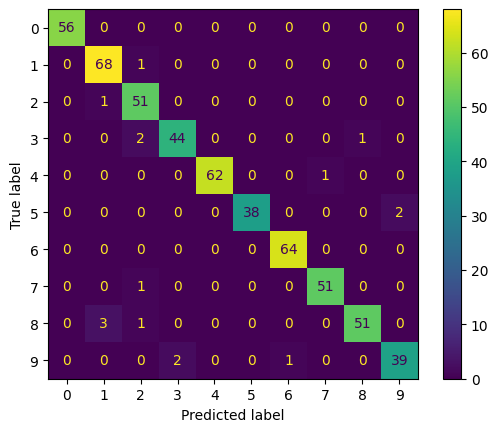

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=..., display_labels=...)
disp.plot()
plt.show()